In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def order_book(month,day):
    data1 = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_0'+str(month)+'_'+str(day)+'_order_book_final.csv'
    data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
    data_book = data1[['0','1','2','3']]
    return data_book

In [3]:
def day_time(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.0'+str(month)+'.'+str(day)+'.csv'
    data = pd.read_csv(datapath)
    data_CNF14 = data[data.Series == 'CNF14']
    data = data_CNF14
    market_open_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D09:00')].index.tolist()[0] 
    market_close_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D16:00')].index.tolist()[0] 
    data_open = data[market_open_time:market_close_time + 1]
    timestamp_ = data_open.TimeStamp.unique()
    return timestamp_

In [4]:
def time_transform(timestamp_time):
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600 \
                +float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60\
                +float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second.append(second - 32400.0)
    return  time_second

In [5]:
def bid123_ask123_Q(data_book_28_open):
    Bid1 = []
    Bid2 = []
    Bid3 = []
    Bid1_Quantity = []
    Bid2_Quantity = []
    Bid3_Quantity = []
    Ask1 = []
    Ask2 = []
    Ask3 = []
    Ask1_Quantity = []
    Ask2_Quantity = []
    Ask3_Quantity = []

    TimeStamp = []
    for i in range(1,len(data_book_28_open),4):
        #print data_book_28_open.iloc[i]['0']
        #print data_book_28_open.iloc[i]['2']
        Bid1.append(float(data_book_28_open.iloc[i]['0'])/100.0)
        Bid1_Quantity.append(float(data_book_28_open.iloc[i]['1']))

        Bid2.append(float(data_book_28_open.iloc[i + 1]['0'])/100.0)
        Bid2_Quantity.append(float(data_book_28_open.iloc[i + 1]['1']))  

        Bid3.append(float(data_book_28_open.iloc[i + 2]['0'])/100.0)
        Bid3_Quantity.append(float(data_book_28_open.iloc[i + 2]['1']))  

        Ask1.append(float(data_book_28_open.iloc[i]['2'])/100.0) 
        Ask1_Quantity.append(float(data_book_28_open.iloc[i]['3']))

        Ask2.append(float(data_book_28_open.iloc[i + 1]['2'])/100.0) 
        Ask2_Quantity.append(float(data_book_28_open.iloc[i + 1]['3']))    

        Ask3.append(float(data_book_28_open.iloc[i + 2]['2'])/100.0) 
        Ask3_Quantity.append(float(data_book_28_open.iloc[i + 2]['3']))    
        TimeStamp.append(data_book_28_open.iloc[i-1][1])
    return Bid1,Bid1_Quantity,Bid2,Bid2_Quantity,Bid3,Bid3_Quantity,Ask1,Ask1_Quantity,Ask2,Ask2_Quantity,Ask3,Ask3_Quantity,    

In [6]:
def rise_ask(Ask1,timestamp_time_second):
    rise_ratio = []
    index = np.where(np.array(timestamp_time_second) >= 600)[0][0]
    for i in range(0,index):
        rise_ratio_ = round((Ask1[i] - Ask1[0])*(1.0)/Ask1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(index,len(Ask1),1):
        #print timestamp_time_second[:i]
        #print timestamp_time_second[i] - 600
        #print np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        index_start = np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        rise_ratio_ = round((Ask1[i] - Ask1[index_start])*(1.0)/Ask1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return rise_ratio

In [7]:
def rise_bid(Bid1,timestamp_time_second):
    rise_ratio = []
    index = np.where(np.array(timestamp_time_second) >= 600)[0][0]
    for i in range(0,index):
        rise_ratio_ = round((Bid1[i] - Bid1[0])*(1.0)/Bid1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(index,len(Bid1),1):
        index_start = np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        rise_ratio_ = round((Bid1[i] - Bid1[index_start])*(1.0)/Bid1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return rise_ratio

### 1/16

In [8]:
data_book = order_book(1,16)
data_book_open = data_book[1380:285495+1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,16)
timestamp_time_second = time_transform(timestamp_time)

In [13]:
#timestamp_time_second

In [9]:
import time 
start = time.time()
Bid1_16,Bid1_Quantity_16,Bid2_16,Bid2_Quantity_16,Bid3_16,Bid3_Quantity_16,Ask1_16,Ask1_Quantity_16,Ask2_16,Ask2_Quantity_16,Ask3_16,Ask3_Quantity_16 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 109.191883


In [10]:
import time 
start = time.time()
rise_ratio_ask_16 = rise_ask(Ask1_16,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 85.405191


In [152]:
import time 
start = time.time()
rise_ratio_bid_16 = rise_bid(Bid1_16,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 120.984360


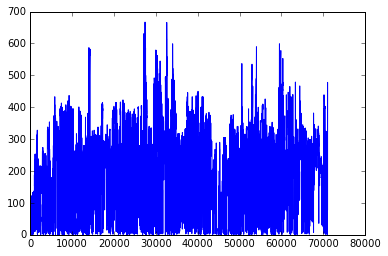

In [13]:
plot(Bid1_Quantity_16)

In [66]:
Bid1_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Bid1_Quantity_16_.append(Bid1_Quantity_16[index])

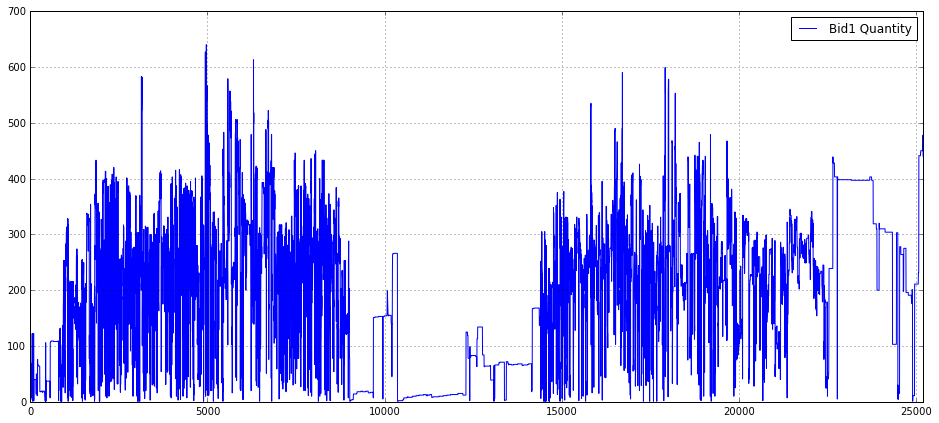

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Bid1_Quantity_16_,label = 'Bid1 Quantity')

plt.xlim(0.0,25200)
plt.legend(loc = 1)

In [75]:
Bid2_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Bid2_Quantity_16_.append(Bid2_Quantity_16[index])

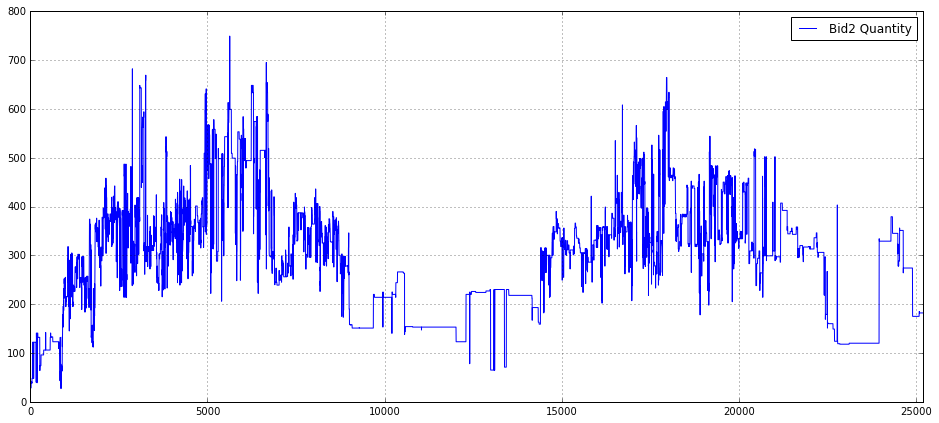

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Bid2_Quantity_16_,label = 'Bid2 Quantity')
plt.xlim(0.0,25200)
plt.legend(loc = 1)

In [77]:
Bid3_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Bid3_Quantity_16_.append(Bid3_Quantity_16[index])

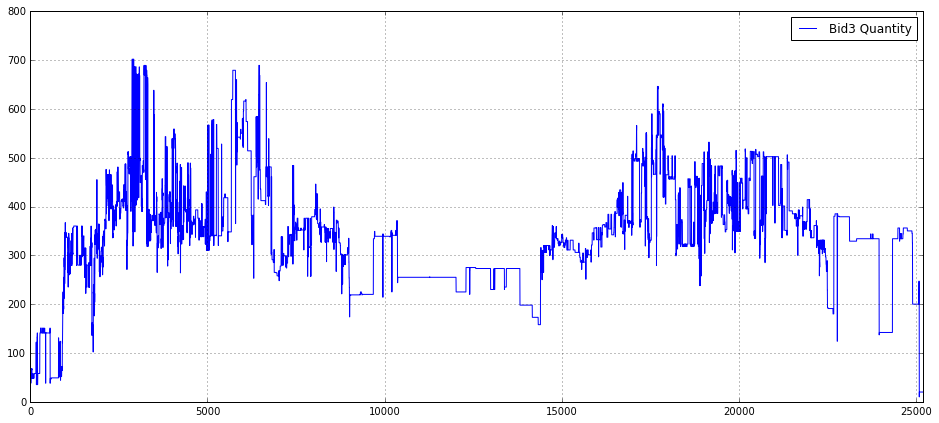

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Bid3_Quantity_16_,label = 'Bid3 Quantity')
plt.xlim(0.0,25200)
plt.legend(loc = 1)

In [78]:
Ask1_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Ask1_Quantity_16_.append(Ask1_Quantity_16[index])

In [79]:
Ask2_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Ask2_Quantity_16_.append(Ask2_Quantity_16[index])

In [80]:
Ask3_Quantity_16_ = []
for i in range(0,25200,1):
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    Ask3_Quantity_16_.append(Ask3_Quantity_16[index])

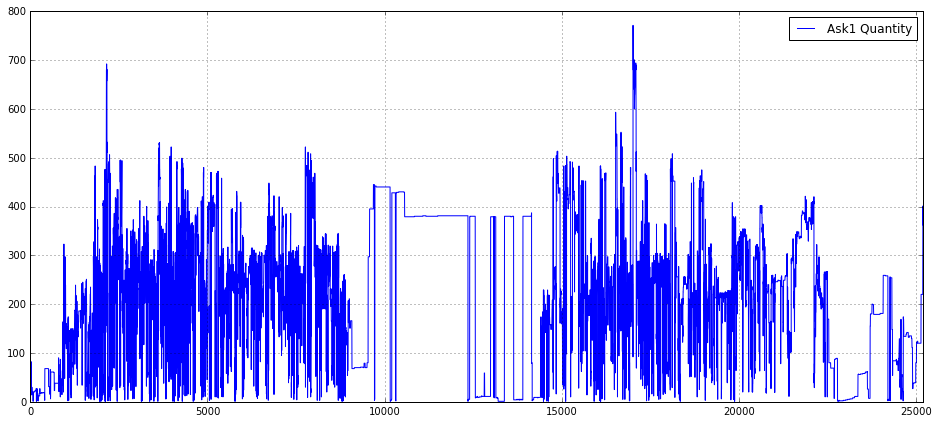

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Ask1_Quantity_16_,label = 'Ask1 Quantity')
plt.xlim(0.0,25200)
plt.legend(loc = 1)

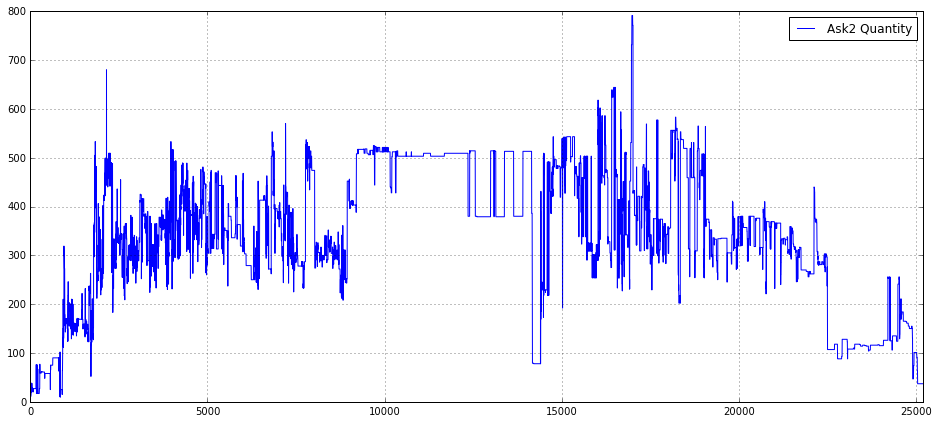

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Ask2_Quantity_16_,label = 'Ask2 Quantity')
plt.xlim(0.0,25200)
plt.legend(loc = 1)

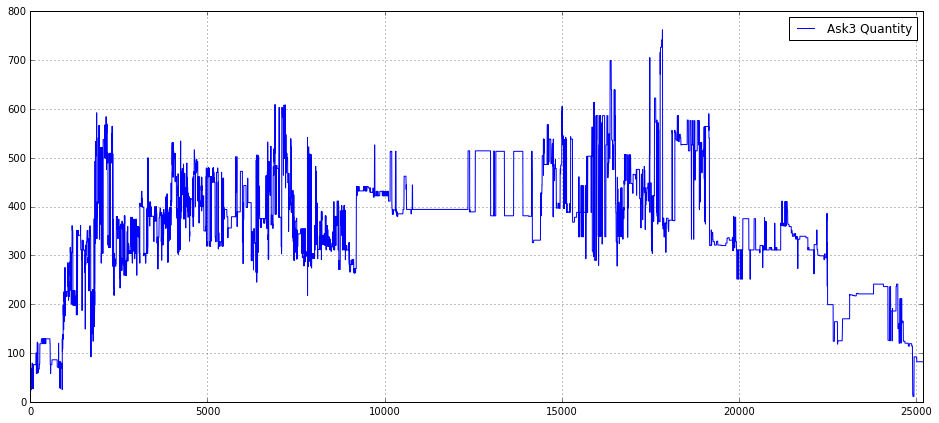

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Ask3_Quantity_16_,label = 'Ask3 Quantity')
plt.xlim(0.0,25200)
plt.legend(loc = 1)

In [16]:
bas_16 = array(Ask1_16) - array(Bid1_16)

In [28]:
bas_16_one_second = []
for i in range(0,25200,1):
    
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    bas_16_one_second.append(bas_16[index])

In [29]:
len(bas_16_one_second)

25200

(array([   300.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  21668.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
          3232.]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
         1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36,  1.4 ,
         1.44,  1.48,  1.52,  1.56,  1.6 ,  1.64,  1.68,  1.72,  1.76,
         1.8 ,  1.84,  1.88,  1.92,  1.96,  2.  ]),
 <a list of 50 Patch objects>)

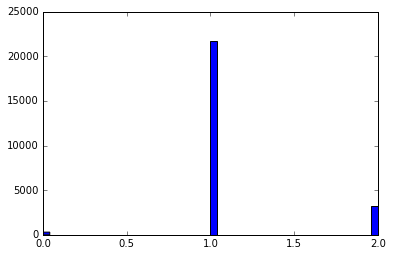

In [35]:

hist(array(bas_16_one_second)/5.0,bins = 50)

In [38]:
min_Ask1_16_time_series = []
min_Ask1_16_time_series.append(0)
for i in range(1,len(Ask1_16),1):
    min_Ask1_16_time_series.append(min(Ask1_16[i:]))

In [39]:
max_Bid1_16_time_series = []
max_Bid1_16_time_series.append(0)
for i in range(1,len(Bid1_16),1):
    max_Bid1_16_time_series.append(max(Bid1_16[i:]))

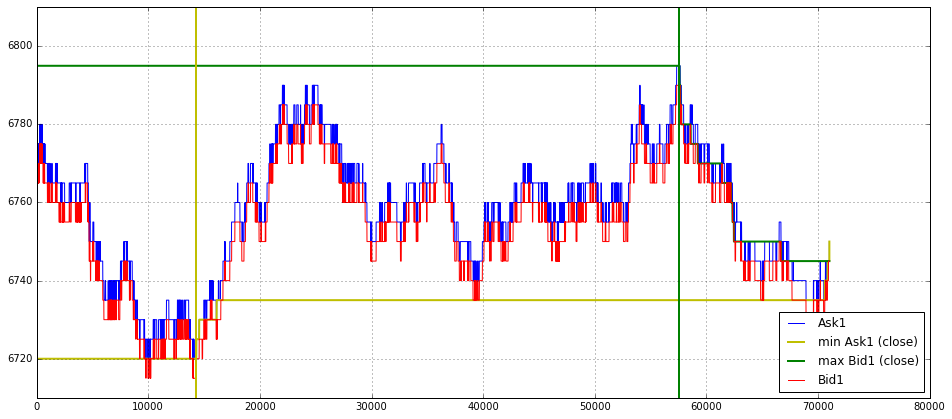

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
plt.grid()
plot(Ask1_16[0:len(Ask1_16)],label = 'Ask1',color = 'b')
#plot(Ask2[0:data_trade_time_series_0900_0930],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_0900_0930],label = 'Ask3')
plot(min_Ask1_16_time_series[0:len(Ask1_16)],label = 'min Ask1 (close)', linewidth = 2,color = 'y')
plot(max_Bid1_16_time_series[0:len(Ask1_16)],label = 'max Bid1 (close)', linewidth = 2,color = 'g')

plot(Bid1_16[0:len(Ask1_16)],label = 'Bid1',color = 'r')
#plot(Bid2[0:data_trade_time_series_0900_0930],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_0900_0930],label = 'Bid3')
plt.ylim(6710,6810)
plt.legend(loc = 4)
index1 = np.where(np.array(max_Bid1_16_time_series[0:len(Ask1_16)]) == max(max_Bid1_16_time_series[0:len(Ask1_16)]))[0][-1]
plt.axvline(x = index1 ,color = 'g',linestyle = '-',label = 0.4, linewidth = 2)
index2 = np.where(np.array(min_Ask1_16_time_series[0:len(Ask1_16)]) == unique(min_Ask1_16_time_series[0:len(Ask1_16)][1]))[0][-1]
plt.axvline(x = index2 ,color = 'y',linestyle = '-',label = 0.4, linewidth = 2)


In [49]:
max(max_Bid1_16_time_series[0:len(Ask1_16)])

6795.0

In [52]:
index = np.where(np.array(max_Bid1_16_time_series[0:len(Ask1_16)]) == max(max_Bid1_16_time_series[0:len(Ask1_16)]))[0][-1]

In [56]:
unique(min_Ask1_16_time_series[0:len(Ask1_16)])

array([    0.,  6720.,  6725.,  6730.,  6735.,  6740.,  6745.,  6750.])

In [153]:
timestamp_time_second[70000]

22469.0

In [102]:
import time 
start = time.time()
min15_Ask1_time_series = []
min15_Ask1_time_series.append(0)
i = 0
for j in range(1,len(Ask1),1):
    
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    #print 'i = %d'%(i)
    #print 'index = %d'%(index)
    #print 'timestamp = %d'%(timestamp_time_second[index])
    if i < 25200 - 900:
            index_15_min = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]
    min_15 = min(Ask1[(index+1):(index + 1 + index_15_min + 1)])
    min15_Ask1_time_series.append(min_15)
    if timestamp_time_second[j] > i:
        i = i + 1
    
#max_Bid1_time_series = []
#max_Bid1_time_series.append(0)
#for i in range(1,len(Ask1),1):
#    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 287.141661


In [103]:
import time 
start = time.time()
max_Bid1_time_series = []
max_Bid1_time_series.append(0)
i = 0
for j in range(1,len(Bid1),1):
    
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    #print 'i = %d'%(i)
    #print 'index = %d'%(index)
    #print 'timestamp = %d'%(timestamp_time_second[index])
    if i < 25200 - 900:
            index_15_max = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]
    max_15 = max(Bid1[(index+1):(index + 1 + index_15_max + 1)])
    max_Bid1_time_series.append(max_15)
    if timestamp_time_second[j] > i:
        i = i + 1

end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 262.486386


In [90]:
len(min15_Ask1_time_series)

1000

In [118]:
#min15_Ask1_time_series
#max_Bid1_time_series

In [10]:
close_price = 6750
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

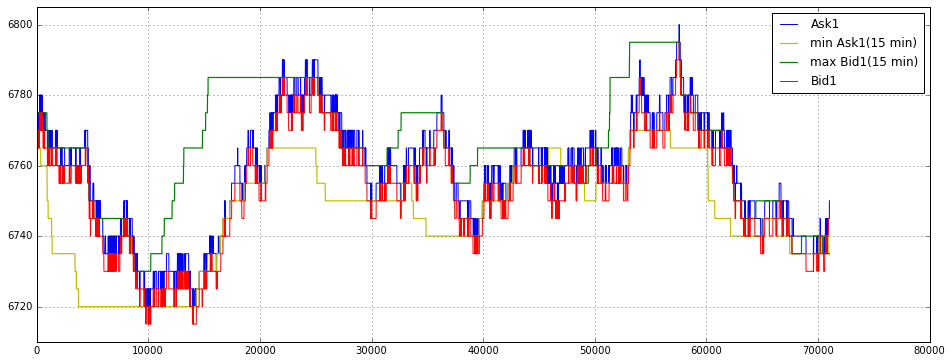

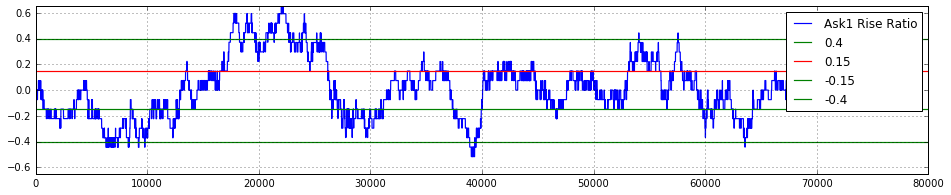

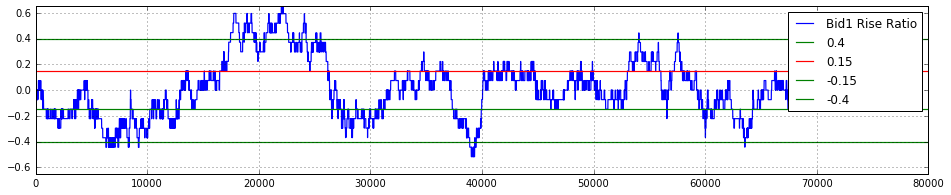

In [344]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
plt.grid()
plot(Ask1_16[0:len(Ask1_16)],label = 'Ask1',color = 'b')
#plot(Ask2[0:len(Ask1)],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
plot(min15_Ask1_time_series[0:len(Ask1_16)],label = 'min Ask1(15 min)', linewidth = 1.2,color = 'y')
plot(max_Bid1_time_series[0:len(Ask1_16)],label = 'max Bid1(15 min)', linewidth = 1.2,color = 'g')

plot(Bid1_16[0:len(Bid1_16)],label = 'Bid1',color = 'r')
#plot(Bid2[0:len(Ask1)],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6710,6805)
plt.legend(loc = 1)
plt.figure(figsize = (16,3))
plt.grid()
plot(rise_ratio_ask_16,label = 'Ask1 Rise Ratio', linewidth = 1.2,color = 'b')

plt.axhline(0.4,color = 'g',linestyle = '-',label = 0.4, linewidth = 1.2)
plt.axhline(0.15,color = 'r',linestyle = '-',label = 0.15, linewidth = 1.2)
plt.axhline(-0.15,color = 'g',linestyle = '-',label = -0.15, linewidth = 1.2)
plt.axhline(-0.4,color = 'g',linestyle = '-',label = -0.4, linewidth = 1.2)
plt.ylim(-0.65,0.65)
plt.legend(loc = 1)

plt.figure(figsize = (16,3))
plt.grid()
plot(rise_ratio_bid_16,label = 'Bid1 Rise Ratio', linewidth = 1.2,color = 'b')

plt.axhline(0.4,color = 'g',linestyle = '-',label = 0.4, linewidth = 1.2)
plt.axhline(0.15,color = 'r',linestyle = '-',label = 0.15, linewidth = 1.2)
plt.axhline(-0.15,color = 'g',linestyle = '-',label = -0.15, linewidth = 1.2)
plt.axhline(-0.4,color = 'g',linestyle = '-',label = -0.4, linewidth = 1.2)
plt.ylim(-0.65,0.65)
plt.legend(loc = 1)

### Day 1/17

In [241]:
data_book = order_book(1,17)
data_book_open = data_book[968:377687+1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,17)
timestamp_time_second = time_transform(timestamp_time)

In [242]:
import time 
start = time.time()
Bid1_17,Bid1_Quantity_17,Bid2_17,Bid2_Quantity_17,Bid3_17,Bid3_Quantity_17,Ask1_17,Ask1_Quantity_17,Ask2_17,Ask2_Quantity_17,Ask3_17,Ask3_Quantity_17 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 207.678575


In [117]:
import time 
start = time.time()
rise_ratio_ask_17 = rise_ask(Ask1_17,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 269.750579


In [243]:
import time 
start = time.time()
rise_ratio_bid_17 = rise_bid(Bid1_17,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 287.709610


In [119]:
close_price = 6680
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/20

In [244]:
data_book = order_book(1,20)
data_book_open = data_book[1300:332255+1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,20)
timestamp_time_second = time_transform(timestamp_time)

In [245]:
import time 
start = time.time()
Bid1_20,Bid1_Quantity_20,Bid2_20,Bid2_Quantity_20,Bid3_20,Bid3_Quantity_20,Ask1_20,Ask1_Quantity_20,Ask2_20,Ask2_Quantity_20,Ask3_20,Ask3_Quantity_20 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 171.396542


In [122]:
import time 
start = time.time()
rise_ratio_ask_20 = rise_ask(Ask1_20,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 185.169573


In [246]:
import time 
start = time.time()
rise_ratio_bid_20 = rise_bid(Bid1_20,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 450.930993


In [123]:
close_price = 6655
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/21

In [247]:
data_book = order_book(1,21)
data_book_open = data_book[1236:351679+1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,21)
timestamp_time_second = time_transform(timestamp_time)

In [248]:
import time 
start = time.time()
Bid1_21,Bid1_Quantity_21,Bid2_21,Bid2_Quantity_21,Bid3_21,Bid3_Quantity_21,Ask1_21,Ask1_Quantity_21,Ask2_21,Ask2_Quantity_21,Ask3_21,Ask3_Quantity_21 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 182.635018


In [126]:
import time 
start = time.time()
rise_ratio_ask_21 = rise_ask(Ask1_21,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 286.437052


In [249]:
import time 
start = time.time()
rise_ratio_bid_21 = rise_bid(Bid1_21,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 530.859111


In [127]:
close_price = 6710
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/22

In [250]:
data_book = order_book(1,22)
data_book_open = data_book[1304:368779+1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,22)
timestamp_time_second = time_transform(timestamp_time)

In [251]:
import time 
start = time.time()
Bid1_22,Bid1_Quantity_22,Bid2_22,Bid2_Quantity_22,Bid3_22,Bid3_Quantity_22,Ask1_22,Ask1_Quantity_22,Ask2_22,Ask2_Quantity_22,Ask3_22,Ask3_Quantity_22 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 189.205451


In [130]:
import time 
start = time.time()
rise_ratio_ask_22 = rise_ask(Ask1_22,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 220.428587


In [252]:
import time 
start = time.time()
rise_ratio_bid_22 = rise_bid(Bid1_22,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 485.494036


In [131]:
close_price = 6870
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/24

In [253]:
data_book = order_book(1,24)
data_book_open = data_book[920:331143 + 1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,24)
timestamp_time_second = time_transform(timestamp_time)

In [254]:
import time 
start = time.time()
Bid1_24,Bid1_Quantity_24,Bid2_24,Bid2_Quantity_24,Bid3_24,Bid3_Quantity_24,Ask1_24,Ask1_Quantity_24,Ask2_24,Ask2_Quantity_24,Ask3_24,Ask3_Quantity_24 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 164.621089


In [134]:
import time 
start = time.time()
rise_ratio_ask_24 = rise_ask(Ask1_24,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 162.300534


In [255]:
import time 
start = time.time()
rise_ratio_bid_24 = rise_bid(Bid1_24,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 381.218866


In [135]:
close_price = 6815
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/27

In [256]:
data_book = order_book(1,27)
data_book_open = data_book[1112 : 266575 + 1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,27)
timestamp_time_second = time_transform(timestamp_time)

In [257]:
import time 
start = time.time()
Bid1_27,Bid1_Quantity_27,Bid2_27,Bid2_Quantity_27,Bid3_27,Bid3_Quantity_27,Ask1_27,Ask1_Quantity_27,Ask2_27,Ask2_Quantity_27,Ask3_27,Ask3_Quantity_27 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 134.039084


In [138]:
import time 
start = time.time()
rise_ratio_ask_27 = rise_ask(Ask1_27,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 124.303481


In [258]:
import time 
start = time.time()
rise_ratio_bid_27 = rise_bid(Bid1_27,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 237.341071


In [139]:
close_price = 6710
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/28

In [259]:
data_book = order_book(1,28)
data_book_open = data_book[213*4-3 : 67229*4 + 1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,28)
timestamp_time_second = time_transform(timestamp_time)

In [260]:
import time 
start = time.time()
Bid1_28,Bid1_Quantity_28,Bid2_28,Bid2_Quantity_28,Bid3_28,Bid3_Quantity_28,Ask1_28,Ask1_Quantity_28,Ask2_28,Ask2_Quantity_28,Ask3_28,Ask3_Quantity_28 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 133.678375


In [142]:
import time 
start = time.time()
rise_ratio_ask_28 = rise_ask(Ask1_28,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 100.058279


In [261]:
import time 
start = time.time()
rise_ratio_bid_28 = rise_bid(Bid1_28,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 254.872605


In [143]:
close_price = 6750
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

### Day 1/29

In [262]:
data_book = order_book(1,29)
data_book_open = data_book[602:128801 + 1] # 9:00 ~ 16:00
data_book_open = data_book_open.reset_index(drop = True)
timestamp_time = day_time(1,29)
timestamp_time_second = time_transform(timestamp_time)

In [263]:
import time 
start = time.time()
Bid1_29,Bid1_Quantity_29,Bid2_29,Bid2_Quantity_29,Bid3_29,Bid3_Quantity_29,Ask1_29,Ask1_Quantity_29,Ask2_29,Ask2_Quantity_29,Ask3_29,Ask3_Quantity_29 = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 63.966075


In [146]:
import time 
start = time.time()
rise_ratio_ask_29 = rise_ask(Ask1_29,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 21.391618


In [264]:
import time 
start = time.time()
rise_ratio_bid_29 = rise_bid(Bid1_29,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 49.096475


In [147]:
close_price = 6775
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

In [162]:
Bid1_Quantity = Bid1_Quantity_16 + Bid1_Quantity_17 + Bid1_Quantity_20 \
              + Bid1_Quantity_21 + Bid1_Quantity_22 + Bid1_Quantity_24 + Bid1_Quantity_27\
              + Bid1_Quantity_28 + Bid1_Quantity_29

In [179]:
Bid2_Quantity = Bid2_Quantity_16 + Bid2_Quantity_17 + Bid2_Quantity_20 \
              + Bid2_Quantity_21 + Bid2_Quantity_22 + Bid2_Quantity_24 + Bid2_Quantity_27\
              + Bid2_Quantity_28 + Bid2_Quantity_29

In [180]:
Bid3_Quantity = Bid3_Quantity_16 + Bid3_Quantity_17 + Bid3_Quantity_20 \
              + Bid3_Quantity_21 + Bid3_Quantity_22 + Bid3_Quantity_24 + Bid3_Quantity_27\
              + Bid3_Quantity_28 + Bid3_Quantity_29

In [184]:
#len(Bid3_Quantity)

In [185]:
Bid_weighted = array(Bid1_Quantity)*0.50 + array(Bid2_Quantity)*0.3 + array(Bid3_Quantity)*0.2

In [186]:
len(Bid_weighted)

675417

In [191]:
Ask1_Quantity = Ask1_Quantity_16 + Ask1_Quantity_17 + Ask1_Quantity_20 \
              + Ask1_Quantity_21 + Ask1_Quantity_22 + Ask1_Quantity_24 + Ask1_Quantity_27\
              + Ask1_Quantity_28 + Ask1_Quantity_29

In [192]:
Ask2_Quantity = Ask2_Quantity_16 + Ask2_Quantity_17 + Ask2_Quantity_20 \
              + Ask2_Quantity_21 + Ask2_Quantity_22 + Ask2_Quantity_24 + Ask2_Quantity_27\
              + Ask2_Quantity_28 + Ask2_Quantity_29

In [193]:
Ask3_Quantity = Ask3_Quantity_16 + Ask3_Quantity_17 + Ask3_Quantity_20 \
              + Ask3_Quantity_21 + Ask3_Quantity_22 + Ask3_Quantity_24 + Ask3_Quantity_27\
              + Ask3_Quantity_28 + Ask3_Quantity_29

In [194]:
Ask_weighted = array(Ask1_Quantity)*0.50 + array(Ask2_Quantity)*0.3 + array(Ask3_Quantity)*0.2

In [195]:
len(Ask_weighted)

675417

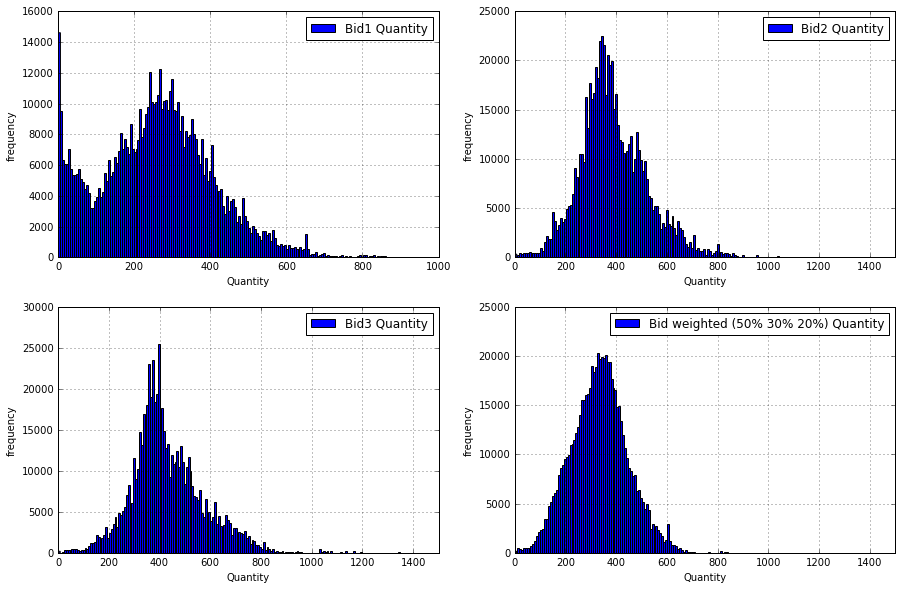

In [210]:
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.grid()
plt.hist(Bid1_Quantity,bins = 700,label = 'Bid1 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1000)
plt.legend(loc = 1)

plt.subplot(322)
plt.grid()
plt.hist(Bid2_Quantity,bins = 200,label = 'Bid2 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)

plt.subplot(323)
plt.grid()
plt.hist(Bid3_Quantity,bins = 200,label = 'Bid3 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)

plt.subplot(324)
plt.grid()
plt.hist(Bid_weighted,bins = 300,label = 'Bid weighted (50% 30% 20%) Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)


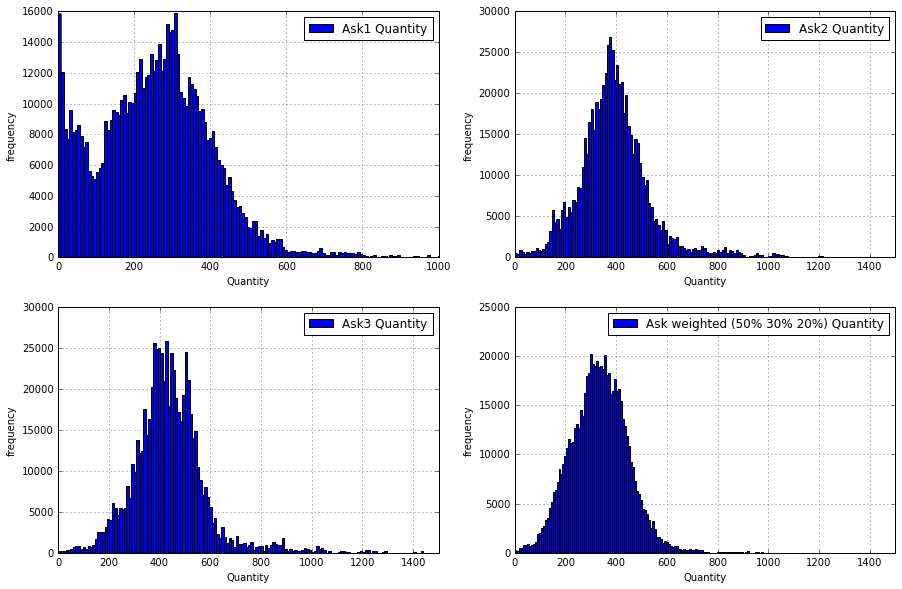

In [211]:
plt.figure(figsize = (15,15))
plt.subplot(321)
plt.grid()
plt.hist(Ask1_Quantity,bins = 900,label = 'Ask1 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1000)
plt.legend(loc = 1)

plt.subplot(322)
plt.grid()
plt.hist(Ask2_Quantity,bins = 700,label = 'Ask2 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)

plt.subplot(323)
plt.grid()
plt.hist(Ask3_Quantity,bins = 150,label = 'Ask3 Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)

plt.subplot(324)
plt.grid()
plt.hist(Ask_weighted,bins = 500,label = 'Ask weighted (50% 30% 20%) Quantity')
plt.xlabel("Quantity")
plt.ylabel("frequency")
plt.xlim(0,1500)
plt.legend(loc = 1)


In [212]:
divid_weighted = array(Bid_weighted) / array(Ask_weighted)

In [214]:
len(divid_weighted)

675417

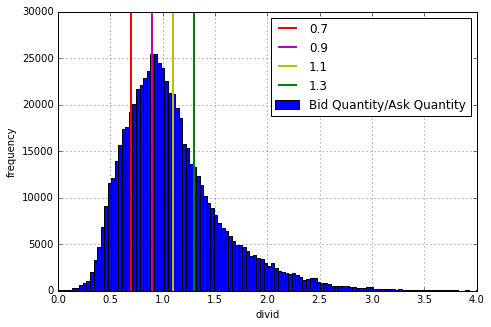

In [278]:
plt.figure(figsize = (7.5,5))
plt.grid()
plt.hist(divid_weighted,bins = 2000,label = 'Bid Quantity/Ask Quantity')
plt.xlabel("divid")
plt.ylabel("frequency")
plt.xlim(0,4)
plt.axvline(x = 0.7 , color = 'r',linestyle = '-',label = 0.7, linewidth = 2)
plt.axvline(x = 0.9 , color = 'm',linestyle = '-',label = 0.9, linewidth = 2)
plt.axvline(x = 1.1 , color = 'y',linestyle = '-',label = 1.1, linewidth = 2)
plt.axvline(x = 1.3 , color = 'g',linestyle = '-',label = 1.3, linewidth = 2)
plt.legend(loc = 1)

In [279]:
Ask1 = Ask1_16 + Ask1_17 + Ask1_20 + Ask1_21 + Ask1_22 + Ask1_24 + Ask1_27 + Ask1_28 + Ask1_29
Bid1 = Bid1_16 + Bid1_17 + Bid1_20 + Bid1_21 + Bid1_22 + Bid1_24 + Bid1_27 + Bid1_28 + Bid1_29

In [283]:
Bas = array(Ask1)/5.0 - array(Bid1)/5.0

In [296]:
len(Bas[Bas == 2]),len(Bas[Bas == 1]),len(Bas[Bas == 0])

(65968, 608044, 838)

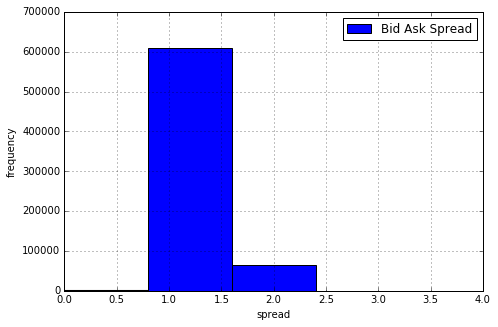

In [309]:
plt.figure(figsize = (7.5,5))
plt.grid()
hist(Bas,label = 'Bid Ask Spread')
plt.xlabel("spread")
plt.ylabel("frequency")
plt.xlim(0,4)
plt.legend(loc = 1)

In [300]:
rise_ratio_ask = rise_ratio_ask_16 + rise_ratio_ask_17 + rise_ratio_ask_20 + rise_ratio_ask_21 + rise_ratio_ask_22 + rise_ratio_ask_24 + rise_ratio_ask_27 + rise_ratio_ask_28 + rise_ratio_ask_29

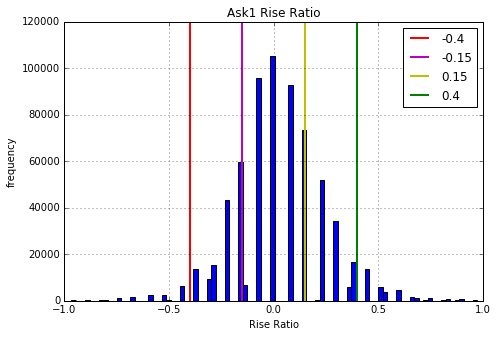

In [325]:
plt.figure(figsize = (7.5,5))
plt.grid()
hist(rise_ratio_ask,bins = 90)
plt.title("Ask1 Rise Ratio")
plt.xlabel("Rise Ratio")
plt.ylabel("frequency")
plt.axvline(x = -0.4 , color = 'r',linestyle = '-',label = -0.4, linewidth = 2)
plt.axvline(x = -0.15 , color = 'm',linestyle = '-',label = -0.15, linewidth = 2)
plt.axvline(x = 0.15 , color = 'y',linestyle = '-',label = 0.15, linewidth = 2)
plt.axvline(x = 0.4 , color = 'g',linestyle = '-',label = 0.4, linewidth = 2)
plt.legend(loc = 1)

In [323]:
rise_ratio_bid = rise_ratio_bid_16 + rise_ratio_bid_17 + rise_ratio_bid_20 + rise_ratio_bid_21 + rise_ratio_bid_22 + rise_ratio_bid_24 + rise_ratio_bid_27 + rise_ratio_bid_28 + rise_ratio_bid_29

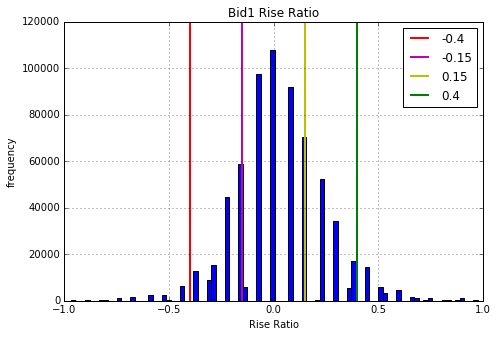

In [326]:
plt.figure(figsize = (7.5,5))
plt.grid()
hist(rise_ratio_bid,bins = 90)
plt.title("Bid1 Rise Ratio")
plt.xlabel("Rise Ratio")
plt.ylabel("frequency")
plt.axvline(x = -0.4 , color = 'r',linestyle = '-',label = -0.4, linewidth = 2)
plt.axvline(x = -0.15 , color = 'm',linestyle = '-',label = -0.15, linewidth = 2)
plt.axvline(x = 0.15 , color = 'y',linestyle = '-',label = 0.15, linewidth = 2)
plt.axvline(x = 0.4 , color = 'g',linestyle = '-',label = 0.4, linewidth = 2)
plt.legend(loc = 1)